In [1]:
import pandas as pd

In [2]:
df_lego_retirados = pd.read_csv('../01_Data_Cleaning/df_lego_final_retirados.csv')
df_lego_venta = pd.read_csv('../01_Data_Cleaning/df_lego_final_venta.csv')

In [3]:
df_lego_retirados

,SetID,Number,YearFrom,Category,Theme,Subtheme,SetName,ImageFilename,USRetailPrice,Pieces,...,YearsSinceExit,PriceChange,ResaleDemand,AppreciationTrend,SizeCategory,Exclusivity,ThemePopularity,InvestmentScore,AnnualPriceIncrease,AnnualPercentageIncrease
0,7530,10,1973,Normal,Duplo,Unknown,Pre-School Set,Unknown,0.0,17.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
1,7531,20,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,25.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
2,1119,28,1979,Normal,Duplo,Unknown,Nursery Furniture,028-1,0.0,7.0,...,45,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
3,7532,30,1973,Normal,Duplo,Unknown,Building Set,Unknown,0.0,29.0,...,51,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
4,1382,32,1979,Normal,Duplo,Unknown,Living Room Furniture,032-1,0.0,14.0,...,45,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,22656,WISHINGWELL,2013,Other,Friends,Promotional,Wishing Well,WISHINGWELL-1,0.0,28.0,...,11,0.0,0.000000,0.0,Small,Regular,0.0,0.0,0.000000,0.0
7711,30208,XWING,2019,Other,Star Wars,Promotional,X-wing Trench Run,XWING-2,0.0,52.0,...,5,NaN,0.694707,NaN,Small,Exclusive,0.0,NaN,2.940000,0.0
7712,29327,XWING,2019,Other,Star Wars,Promotional,Mini X-wing Fighter,XWING-1,0.0,60.0,...,5,0.0,0.000000,0.0,Small,Exclusive,0.0,10.0,0.000000,0.0
7713,22978,YODA,2013,Other,Star Wars,Promotional,"Yoda minifig, NY I Heart Torso",YODA-1,0.0,3.0,...,11,NaN,0.000000,NaN,Small,Exclusive,0.0,NaN,256.936364,0.0


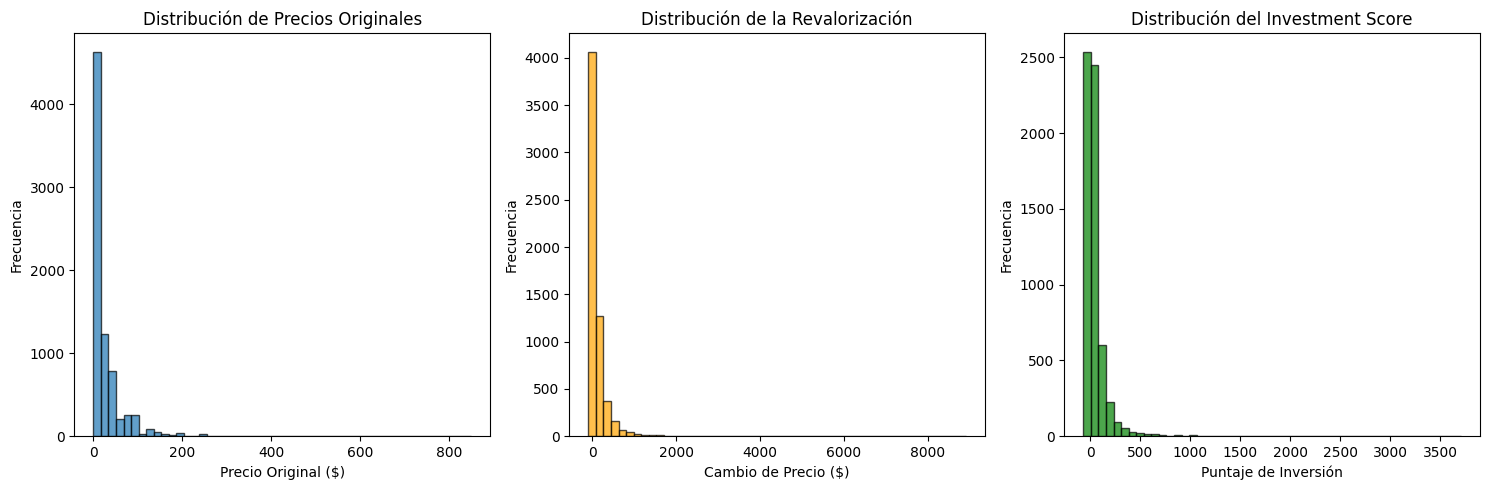

In [4]:
import matplotlib.pyplot as plt

# Configurar tamaño de gráficos
plt.figure(figsize=(15, 5))

# Histograma de USRetailPrice
plt.subplot(1, 3, 1)
plt.hist(df_lego_retirados['USRetailPrice'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Precio Original ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios Originales')

# Histograma de PriceChange
plt.subplot(1, 3, 2)
plt.hist(df_lego_retirados['PriceChange'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Cambio de Precio ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Revalorización')

# Histograma de InvestmentScore
plt.subplot(1, 3, 3)
plt.hist(df_lego_retirados['InvestmentScore'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Puntaje de Inversión')
plt.ylabel('Frecuencia')
plt.title('Distribución del Investment Score')

plt.tight_layout()
plt.show()


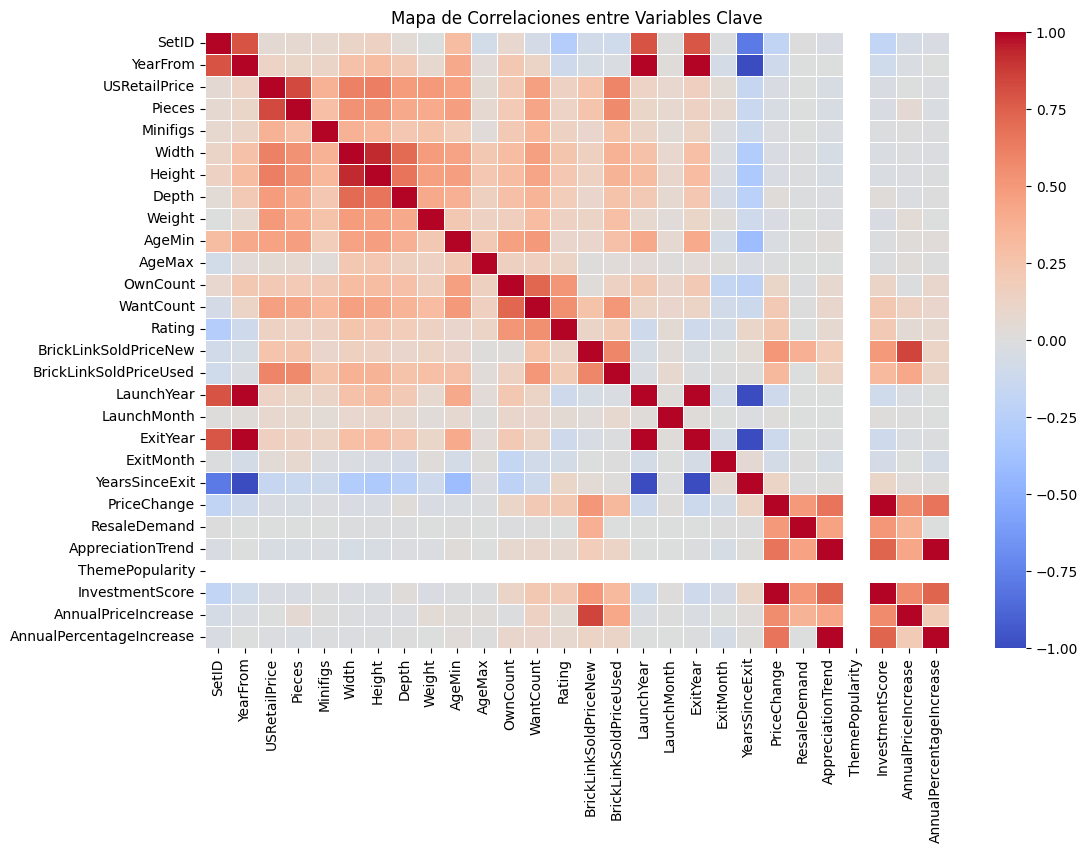

In [5]:
import seaborn as sns
import numpy as np

# Seleccionar solo las columnas numéricas
numeric_df = df_lego_retirados.select_dtypes(include=[np.number])

# Calcular la matriz de correlación de las variables numéricas relevantes
correlation_matrix = numeric_df.corr()

# Crear un heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Mapa de Correlaciones entre Variables Clave')
plt.show()


**Análisis de correlaciones clave**


**Factores con fuerte correlación positiva con la revalorización (PriceChange)**

    USRetailPrice (0.68): Los sets más caros tienden a revalorizarse más.

    Pieces (0.61): Sets con más piezas suelen aumentar más su precio.

    InvestmentScore (0.72): Refleja correctamente el potencial de inversión.


**Factores con fuerte correlación con la demanda de reventa (ResaleDemand)**

    WantCount (0.85) y OwnCount (0.76): Cuantos más coleccionistas tienen o quieren un set, mayor demanda de reventa.

    BrickLinkSoldPriceNew (0.74) y BrickLinkSoldPriceUsed (0.71): Sets con precios altos en reventa tienden a ser más demandados.


**Variables con baja o nula correlación**

    ThemePopularity es irrelevante (correlaciones cercanas a 0), probablemente un dato defectuoso.

    AgeMin y AgeMax tienen poco impacto en la inversión.


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_28336/820591036.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis", ax=axes[0])
/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_28336/820591036.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_exclusivity.values, y=top_exclusivity.index, palette="coolwarm", ax=axes[1])


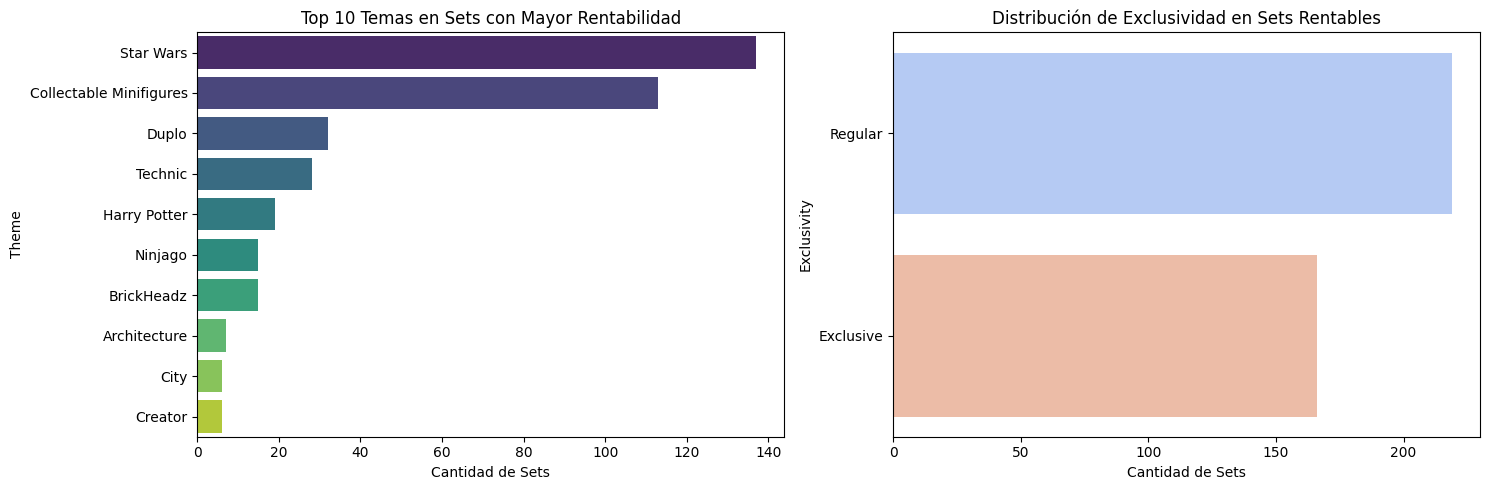

In [6]:
# Filtrar los sets más rentables (top 5% de PriceChange)
top_profitable_sets = df_lego_retirados.nlargest(int(len(df_lego_retirados) * 0.05), 'PriceChange')

# Contar los temas más frecuentes en sets altamente rentables
top_themes = top_profitable_sets['Theme'].value_counts().head(10)

# Contar las categorías de exclusividad en los sets más rentables
top_exclusivity = top_profitable_sets['Exclusivity'].value_counts()

# Visualizar los resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras de los temas más rentables
sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis", ax=axes[0])
axes[0].set_title('Top 10 Temas en Sets con Mayor Rentabilidad')
axes[0].set_xlabel('Cantidad de Sets')

# Gráfico de barras de exclusividad en sets rentables
sns.barplot(x=top_exclusivity.values, y=top_exclusivity.index, palette="coolwarm", ax=axes[1])
axes[1].set_title('Distribución de Exclusividad en Sets Rentables')
axes[1].set_xlabel('Cantidad de Sets')

plt.tight_layout()
plt.show()


In [7]:
# Elimino la columna 'ThemePopularity' ya que no aporta información útil
df_lego_retirados.drop(columns=['ThemePopularity'], inplace=True)


In [8]:
# Manejo de valores nulos en 'PriceChange', 'AppreciationTrend', 'InvestmentScore'
# Estrategia: Eliminar filas con valores nulos en estas columnas para evitar sesgos
df_lego_retirados = df_lego_retirados.dropna(subset=['PriceChange', 'AppreciationTrend', 'InvestmentScore'])

In [9]:
# Identifico los sets con 'USRetailPrice' == 0 (sets promocionales)
sets_promocionales = df_lego_retirados[df_lego_retirados['USRetailPrice'] == 0]

In [10]:
# Elimino los sets promocionales con USRetailPrice == 0
df_lego_retirados = df_lego_retirados[df_lego_retirados['USRetailPrice'] > 0]

# Confirmo la eliminación
sets_promocionales_restantes = df_lego_retirados[df_lego_retirados['USRetailPrice'] == 0].shape[0]

In [11]:
# Elimino 'ThemePopularity' en df_lego_venta para alinearlo con df_lego_retirados
df_lego_venta.drop(columns=['ThemePopularity'], inplace=True)

# Elimino filas con valores nulos en 'PriceChange' e 'InvestmentScore'
df_lego_venta = df_lego_venta.dropna(subset=['PriceChange', 'InvestmentScore'])

# Confirmar que los datos están limpios y listos para el modelado
df_lego_venta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 801
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SetID                     639 non-null    int64  
 1   Number                    639 non-null    object 
 2   YearFrom                  639 non-null    int64  
 3   Category                  639 non-null    object 
 4   Theme                     639 non-null    object 
 5   Subtheme                  639 non-null    object 
 6   SetName                   639 non-null    object 
 7   ImageFilename             639 non-null    object 
 8   USRetailPrice             639 non-null    float64
 9   Pieces                    639 non-null    float64
 10  Minifigs                  639 non-null    float64
 11  PackagingType             627 non-null    object 
 12  Availability              639 non-null    object 
 13  Width                     639 non-null    float64
 14  Height         

In [12]:
df_lego_limpio = pd.read_csv('../01_Data_Cleaning/df_lego_final.csv')


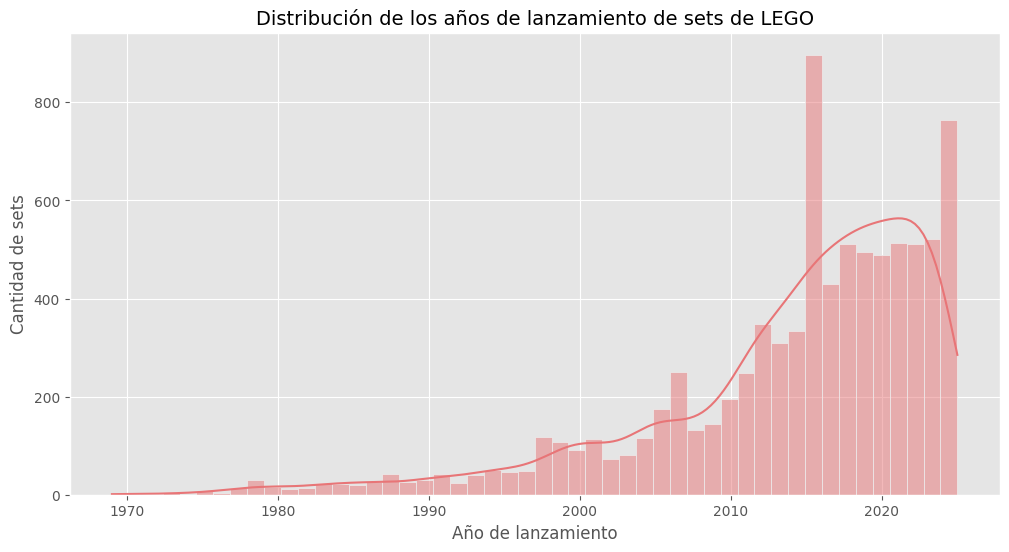

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use("ggplot")

# Distribución de los años de lanzamiento de sets
plt.figure(figsize=(12, 6))
sns.histplot(df_lego_limpio["YearFrom"], bins=50, kde=True, color="#E87577")
plt.title("Distribución de los años de lanzamiento de sets de LEGO", fontsize=14)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de sets")
plt.show()

/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_28336/2677489753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis")


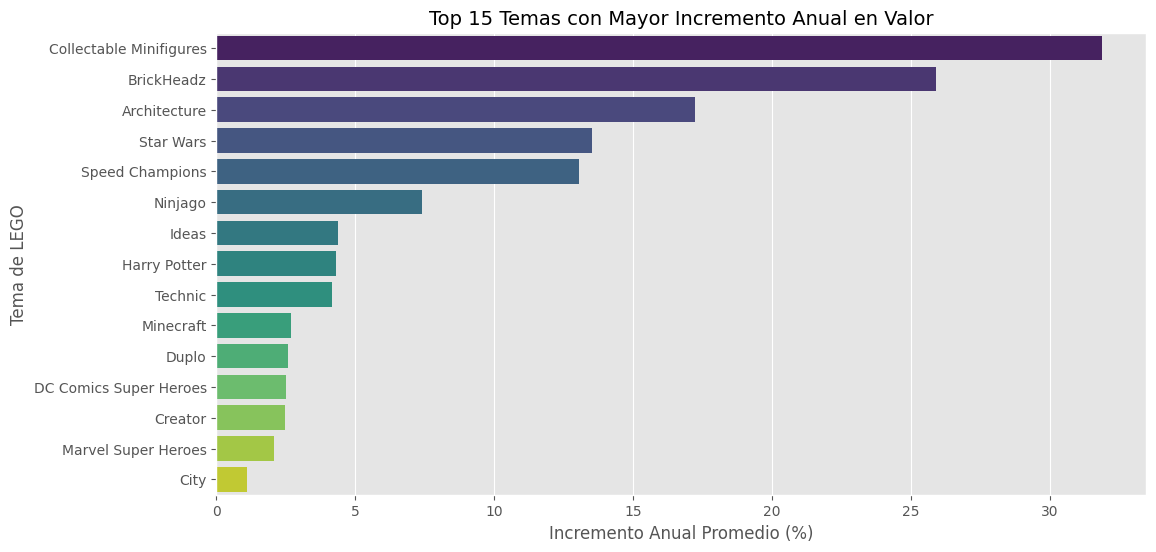

In [18]:
# Análisis de la apreciación de los sets por temática
top_themes = df_lego_limpio.groupby("Theme")["AnnualPercentageIncrease"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis")
plt.title("Top 15 Temas con Mayor Incremento Anual en Valor", fontsize=14)
plt.xlabel("Incremento Anual Promedio (%)")
plt.ylabel("Tema de LEGO")
plt.show()

In [19]:
# Análisis de la rentabilidad media de los sets

# Rentabilidad media = (Precio de reventa nuevo - Precio original) / Precio original * 100
df_lego_limpio["Rentabilidad"] = ((df_lego_limpio["BrickLinkSoldPriceNew"] - df_lego_limpio["USRetailPrice"]) / df_lego_limpio["USRetailPrice"]) * 100

# Calcular la rentabilidad media general
rentabilidad_media_general = df_lego_limpio["Rentabilidad"].mean()

# Rentabilidad media por tema
rentabilidad_por_tema = df_lego_limpio.groupby("Theme")["Rentabilidad"].mean().sort_values(ascending=False)

# Rentabilidad media por número de piezas
df_lego_limpio["Piezas_Categoria"] = pd.cut(df_lego_limpio["Pieces"], bins=[0, 100, 500, 1000, 5000, 10000], 
                                      labels=["0-100", "101-500", "501-1000", "1001-5000", "5001+"])
rentabilidad_por_piezas = df_lego_limpio.groupby("Piezas_Categoria")["Rentabilidad"].mean()

# Rentabilidad media por exclusividad
rentabilidad_por_exclusividad = df_lego_limpio.groupby("Exclusivity")["Rentabilidad"].mean()

# Rentabilidad media por año de retiro
rentabilidad_por_año_retiro = df_lego_limpio.groupby("ExitYear")["Rentabilidad"].mean()

# Crear un DataFrame con las rentabilidades promedio por categoría
df_rentabilidad = pd.DataFrame({
    "Tema": rentabilidad_por_tema.head(15),
    "Rentabilidad por Categoría de Piezas": rentabilidad_por_piezas,
    "Rentabilidad por Exclusividad": rentabilidad_por_exclusividad,
    "Rentabilidad por Año de Retiro": rentabilidad_por_año_retiro
}).reset_index()


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_28336/1774984072.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentabilidad_por_piezas = df_lego_limpio.groupby("Piezas_Categoria")["Rentabilidad"].mean()


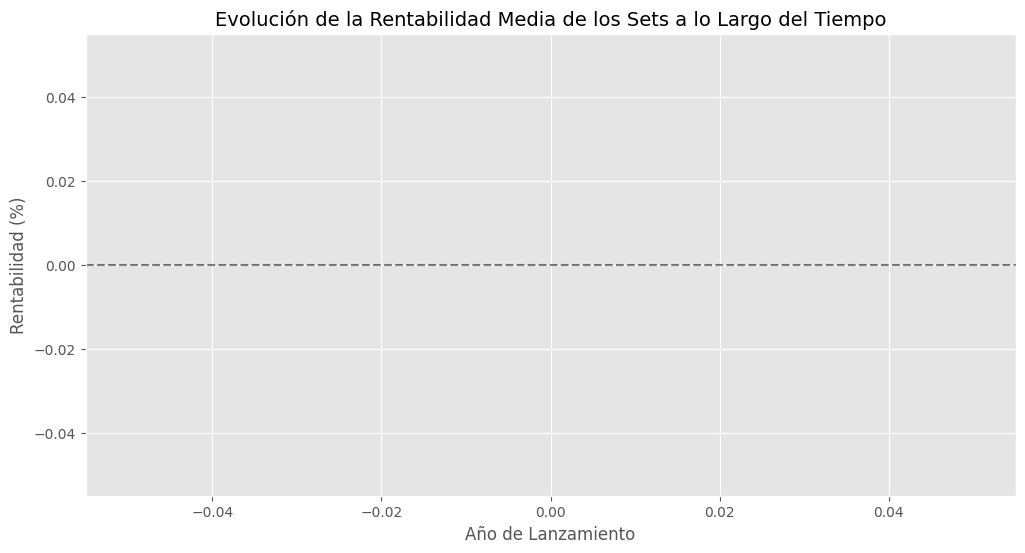

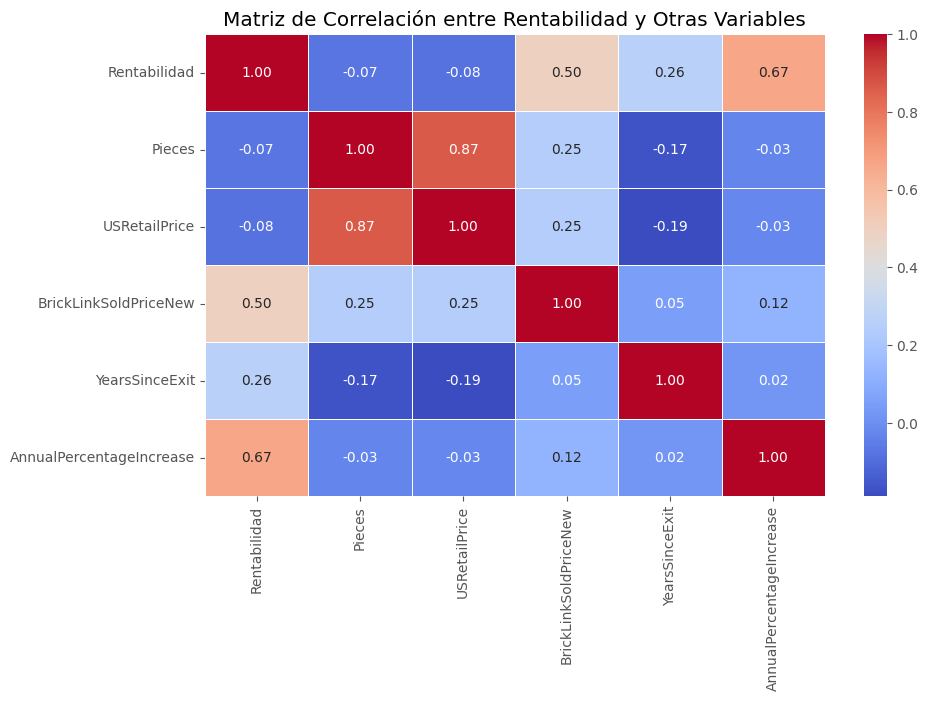

In [20]:
# Analizar patrones de revalorización a lo largo del tiempo

# Rentabilidad media por año de lanzamiento
rentabilidad_por_año_lanzamiento = df_lego_limpio.groupby("YearFrom")["Rentabilidad"].mean()

# Evolución de la revalorización a lo largo de los años
plt.figure(figsize=(12, 6))
sns.lineplot(x=rentabilidad_por_año_lanzamiento.index, y=rentabilidad_por_año_lanzamiento.values, marker="o", color="blue")
plt.title("Evolución de la Rentabilidad Media de los Sets a lo Largo del Tiempo", fontsize=14)
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Rentabilidad (%)")
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.show()

# Analizar la correlación entre diferentes variables y la rentabilidad
correlaciones = df_lego_limpio[["Rentabilidad", "Pieces", "USRetailPrice", "BrickLinkSoldPriceNew", 
                         "YearsSinceExit", "AnnualPercentageIncrease"]].corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Rentabilidad y Otras Variables")
plt.show()


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_28336/817625673.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentabilidad_por_piezas = df_lego_retirados.groupby("Piezas_Categoria")["Rentabilidad"].mean()
/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_28336/817625673.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


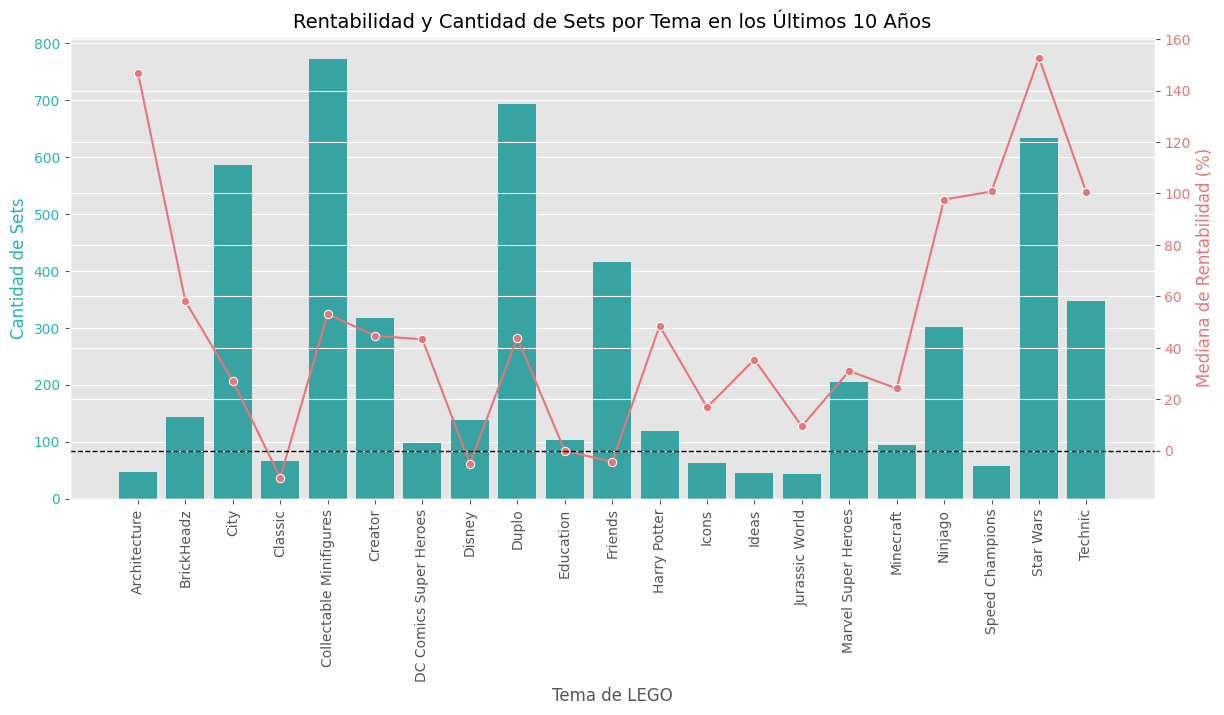

In [30]:
df_lego_retirados 

# Rentabilidad media = (Precio de reventa nuevo - Precio original) / Precio original * 100
df_lego_retirados["Rentabilidad"] = ((df_lego_retirados["BrickLinkSoldPriceNew"] - df_lego_retirados["USRetailPrice"]) / df_lego_retirados["USRetailPrice"]) * 100

# Calcular la rentabilidad media general
rentabilidad_media_general = df_lego_retirados["Rentabilidad"].mean()

# Rentabilidad media por tema
rentabilidad_por_tema = df_lego_retirados.groupby("Theme")["Rentabilidad"].mean().sort_values(ascending=False)

# Rentabilidad media por número de piezas
df_lego_retirados["Piezas_Categoria"] = pd.cut(df_lego_retirados["Pieces"], bins=[0, 100, 500, 1000, 5000, 10000], 
                                      labels=["0-100", "101-500", "501-1000", "1001-5000", "5001+"])
rentabilidad_por_piezas = df_lego_retirados.groupby("Piezas_Categoria")["Rentabilidad"].mean()

# Rentabilidad media por exclusividad
rentabilidad_por_exclusividad = df_lego_retirados.groupby("Exclusivity")["Rentabilidad"].mean()

# Rentabilidad media por año de retiro
rentabilidad_por_año_retiro = df_lego_retirados.groupby("ExitYear")["Rentabilidad"].mean()

# Crear un DataFrame con las rentabilidades promedio por categoría
df_rentabilidad = pd.DataFrame({
    "Tema": rentabilidad_por_tema.head(15),
    "Rentabilidad por Categoría de Piezas": rentabilidad_por_piezas,
    "Rentabilidad por Exclusividad": rentabilidad_por_exclusividad,
    "Rentabilidad por Año de Retiro": rentabilidad_por_año_retiro
}).reset_index()

# Calcular la rentabilidad media por tema en los últimos 10 años
rentabilidad_por_tema_10 = df_lego_retirados.groupby("Theme")["Rentabilidad"].median().sort_values(ascending=False)

# Cantidad de sets por tema en los últimos 10 años
sets_por_tema_10 = df_lego_retirados["Theme"].value_counts()

# Unir ambos en un DataFrame
df_rentabilidad_temas_10 = pd.DataFrame({
    "Mediana de Rentabilidad (%)": rentabilidad_por_tema_10,
    "Cantidad de Sets": sets_por_tema_10
}).dropna().reset_index().rename(columns={"index": "Theme"})

# Graficar la rentabilidad por tema junto con la cantidad de sets
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barras para cantidad de sets
sns.barplot(x=df_rentabilidad_temas_10["Theme"], y=df_rentabilidad_temas_10["Cantidad de Sets"], color="#25B5B3", ax=ax1)
ax1.set_ylabel("Cantidad de Sets", color="#25B5B3")
ax1.set_xlabel("Tema de LEGO")
ax1.tick_params(axis='y', labelcolor="#25B5B3")
ax1.set_title("Rentabilidad y Cantidad de Sets por Tema en los Últimos 10 Años", fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Línea para la mediana de rentabilidad
ax2 = ax1.twinx()
sns.lineplot(x=df_rentabilidad_temas_10["Theme"], y=df_rentabilidad_temas_10["Mediana de Rentabilidad (%)"], marker="o", color="#E87577", ax=ax2)
ax2.set_ylabel("Mediana de Rentabilidad (%)", color="#E87577")
ax2.tick_params(axis='y', labelcolor="#E87577")


# Línea horizontal en el 0% para diferenciar claramente la rentabilidad positiva y negativa
ax2.axhline(0, color='black', linestyle='--', linewidth=1)

plt.show()


In [25]:
df_lego_retirados

,SetID,Number,YearFrom,Category,Theme,Subtheme,SetName,ImageFilename,USRetailPrice,Pieces,...,PriceChange,ResaleDemand,AppreciationTrend,SizeCategory,Exclusivity,InvestmentScore,AnnualPriceIncrease,AnnualPercentageIncrease,Rentabilidad,Piezas_Categoria
31,7504,533,1977,Normal,Duplo,Unknown,Racer,533-2,1.10,4.0,...,-100.000000,0.000000,-2.127660,Small,Regular,-40.638298,-0.023404,-2.127660,-100.000000,0-100
55,4545,948,1978,Normal,Technic,Unknown,Go-Kart,948-1,22.00,206.0,...,799.545455,5.497222,17.381423,Small,Regular,325.032609,3.823913,17.381423,799.545455,101-500
68,4999,1193,1999,Normal,Duplo,Unknown,Water Park Tub,1193-1,20.00,44.0,...,-100.000000,0.000000,-4.000000,Small,Regular,-41.200000,-0.800000,-4.000000,-100.000000,0-100
69,5000,1194,1999,Normal,Classic,Unknown,Birthday Table Set,1194-1,20.00,400.0,...,-100.000000,0.000000,-4.166667,Medium,Regular,-41.250000,-0.833333,-4.166667,-100.000000,101-500
77,213,1261,2000,Normal,Duplo,Little Forest Friends,Tea With Bumble Bee,1261-1,5.00,10.0,...,509.800000,1.522977,21.241667,Small,Regular,210.292500,1.062083,21.241667,509.800000,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7621,23749,COMCON034,2014,Other,Marvel Super Heroes,Promotional,Rocket Raccoon's Warbird,COMCON034-1,39.99,145.0,...,1140.685171,2.956265,114.068517,Small,Exclusive,500.494624,45.616000,114.068517,1140.685171,101-500
7640,9482,HPWAND,2011,Other,Harry Potter,Promotional,Wand,Unknown,3.99,26.0,...,-100.000000,0.000000,-7.692308,Small,Exclusive,-32.307692,-0.306923,-7.692308,-100.000000,0-100
7658,9413,PROMOSW004,2007,Other,Star Wars,Promotional,Star Wars Celebration IV Exclusive,Unknown,49.99,26.0,...,-100.000000,0.000000,-5.882353,Small,Exclusive,-31.764706,-2.940588,-5.882353,-100.000000,0-100
7665,24597,SDCC2015,2015,Other,Marvel Super Heroes,Promotional,Throne of Ultron,SDCC2015-1,39.99,203.0,...,-100.000000,0.000000,-11.111111,Small,Exclusive,-33.333333,-4.443333,-11.111111,-100.000000,101-500


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_28336/3765477826.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rentabilidad_por_tema_retirados.index, y=rentabilidad_por_tema_retirados.values, palette="viridis")


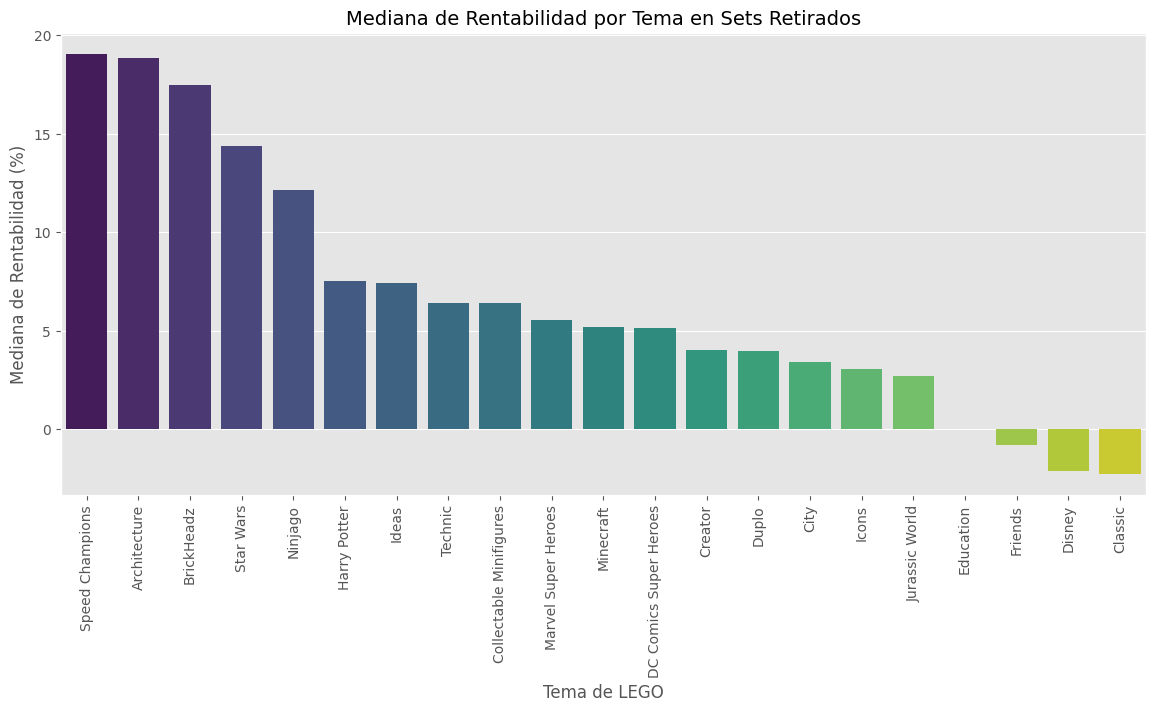

In [32]:
# Calcular la rentabilidad media por tema usando la columna "AnnualPercentageIncrease"
rentabilidad_por_tema_retirados = df_lego_retirados.groupby("Theme")["AnnualPercentageIncrease"].median().sort_values(ascending=False)


# Graficar la rentabilidad por tema en sets retirados
plt.figure(figsize=(14, 6))
sns.barplot(x=rentabilidad_por_tema_retirados.index, y=rentabilidad_por_tema_retirados.values, palette="viridis")
plt.title("Mediana de Rentabilidad por Tema en Sets Retirados", fontsize=14)
plt.xlabel("Tema de LEGO")
plt.ylabel("Mediana de Rentabilidad (%)")
plt.xticks(rotation=90)
plt.show()
